# lab1_2 代码部分


库导入

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pylab as plt
import math

定义插值函数构建

In [2]:
def Linterpolation(ra:np.ndarray,f,x:sp.symbols):
    """
    Linear interpolation.
    :param ra:插值x序列
    :param r:由于是一元表达式，所以只用传入一个一元变量
    :param f:传入函数表达式
    :return:返回一个sympy表达式，后续可以带入实际值运算
    """
    y = 0
    
    n=ra.size
    for k in range(0,n):
        l=1
        for j in range(0,n):
            if j==k:
                continue
            else:
                l=l*(x-ra[j])/(ra[k]-ra[j])
        y=y+l*f(ra[k])
    return y


用平均相对误差来评价差值的准确性

In [3]:
def judge(reals :np.array,evals :np.array):
    """
    判断插值结果是否正确
    :param reals:真实值
    :param evals:插值结果
    :return:
    """
    n=reals.size
    ans=np.zeros(n)
    for i in range(0,n):
        ans[i]=abs((reals[i]-evals[i])/evals[i])

    return np.average(ans)


可视化

## 问题二

### 拉格朗日插值区间越小越好吗？

(1)定义f1(x)
$$
f(x) =  \frac{1}{1+x^2}   
$$

In [4]:
def f1(x):
    """
    :param x:运算参数
    :return:返回计算结果
    """
    return 1/(1+x**2);

设置变量和验证数据列

In [5]:

evals = np.array([-0.95,-0.5,0.5,0.95])
# result_L=np.zeros(evals.size)
result_R=np.array([i for i in f1(evals)])

根据不同差值次数n得出结果

n= 5
x: -0.95 估计值: 0.517147288602941 真实值: 0.5256241787122208
x: -0.5 估计值: 0.804899604072398 真实值: 0.8
x: 0.5 估计值: 0.804899604072398 真实值: 0.8
x: 0.95 估计值: 0.517147288602941 真实值: 0.5256241787122208
平均相对误差: 0.011239429924741341


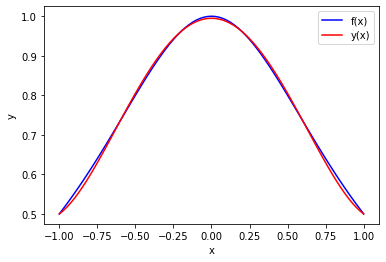

n= 10
x: -0.95 估计值: 6.67295779923840 真实值: 0.5256241787122208
x: -0.5 估计值: -0.279456082512351 真实值: 0.8
x: 0.5 估计值: -0.260102103738223 真实值: 0.8
x: 0.95 估计值: -2.26678882550732 真实值: 0.5256241787122208
平均相对误差: 2.522882572420115


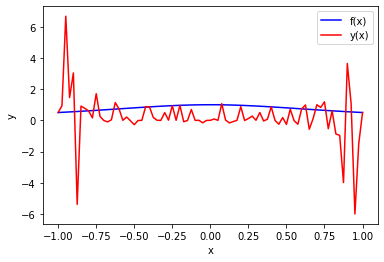

n= 20
x: -0.95 估计值: 0 真实值: 0.5256241787122208
x: -0.5 估计值: 0 真实值: 0.8
x: 0.5 估计值: 0 真实值: 0.8
x: 0.95 估计值: 0 真实值: 0.5256241787122208
平均相对误差: inf


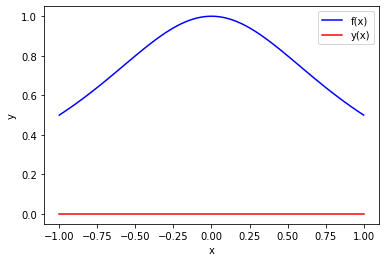

In [6]:
for n in [5,10,20]:
    print("n=",n)
    ra=np.linspace(-1,1,n+1)
    x=sp.symbols('x')
    y=Linterpolation(ra,f1,x)
    result_L=np.array([y.evalf(subs={x:i}) for i in evals])
    for i in range(0,evals.size):
        print("x:",evals[i],"估计值:",result_L[i],"真实值:",result_R[i])
    jud=judge(result_R,result_L)
    # print(sp.simplify(y))
    print("平均相对误差:",jud)

    rx = np.linspace(-1, 1, 2*40 + 1)
    ry1 = np.array([f1(i) for i in rx])
    ry2 = np.array([y.evalf(subs={x:i}) for i in rx])
    plt.plot(rx, ry1, 'b-', label='f(x)')
    plt.plot(rx, ry2, 'r-', label='y(x)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

### 拉格朗日插值区间越小越好吗？

(1)定义f2(x)
$$
f(x) =  e^x

$$

In [7]:
def f2(x):
    """
    :param x:运算参数
    :return:返回计算结果
    """
    return np.exp(x)

设置变量和验证数据列

In [8]:

evals = np.array([-4.75,-0.25,0.25,4.75])
# result_L=np.zeros(evals.size)
result_R=np.array([f2(i) for i in evals])

根据不同差值次数n得出结果

n= 5
x: -4.75 估计值: 1.14703473149440 真实值: 0.008651695203120634
x: -0.25 估计值: 1.30215246363921 真实值: 0.7788007830714049
x: 0.25 估计值: 1.84121041096990 真实值: 1.2840254166877414
x: 4.75 估计值: 119.621007056081 真实值: 115.58428452718766
平均相对误差: 0.43268372074573475
0.0186801291026965*x**5 + 0.122638343247617*x**4 + 0.0837100150763059*x**3 - 0.160810762355857*x**2 + 1.0728110494648*x + 1.58125305392348
1.58125305392348


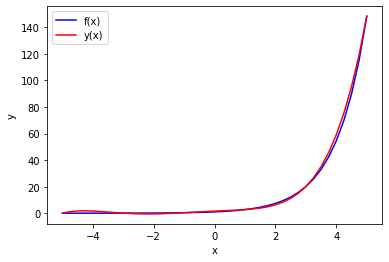

n= 10
x: -4.75 估计值: -0.00195655045944888 真实值: 0.008651695203120634
x: -0.25 估计值: 0.778686343904012 真实值: 0.7788007830714049
x: 0.25 估计值: 1.28414448700240 真实值: 1.2840254166877414
x: 4.75 估计值: 115.607360063054 真实值: 115.58428452718766
平均相对误差: 1.3555879820749048
4.16589702264156e-7*x**10 + 4.50740354171357e-6*x**9 + 2.20211913964803e-5*x**8 + 0.000163566907937791*x**7 + 0.00141017955506279*x**6 + 0.00860113550358025*x**5 + 0.0416073430658901*x**4 + 0.165919291540933*x**3 + 0.500040674413193*x**2 + 1.00051269228781*x + 1.0
1.00000000000000


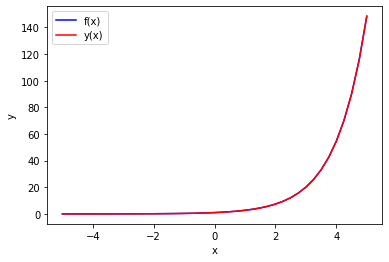

n= 20
x: -4.75 估计值: 0.00865169379250289 真实值: 0.008651695203120634
x: -0.25 估计值: 0.778800783071453 真实值: 0.7788007830714049
x: 0.25 估计值: 1.28402541668769 真实值: 1.2840254166877414
x: 4.75 估计值: 115.584284529367 真实值: 115.58428452718766
平均相对误差: 4.076605481563359e-08
5.06036221700607e-19*x**20 + 1.03305816238341e-17*x**19 + 1.52279752572525e-16*x**18 + 2.72434730523045e-15*x**17 + 4.78788316690679e-14*x**16 + 7.66631645071231e-13*x**15 + 1.14696519796008e-11*x**14 + 1.60565547074044e-10*x**13 + 2.08768259057198e-9*x**12 + 2.50522875234792e-8*x**11 + 2.7557314103604e-7*x**10 + 2.75573102075943e-6*x**9 + 2.48015873925438e-5*x**8 + 0.00019841270063755*x**7 + 0.00138888888875843*x**6 + 0.00833333333018501*x**5 + 0.0416666666668005*x**4 + 0.166666666668497*x**3 + 0.499999999999988*x**2 + 0.999999999999702*x + 1.0
1.00000000000000


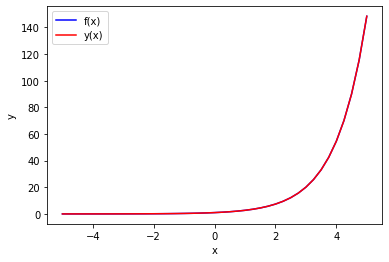

In [9]:
for n in [5,10,20]:
    print("n=",n)
    ra=np.linspace(-5,5,n+1)
    x=sp.symbols('x')
    y=Linterpolation(ra,f2,x)
    result_L=np.array([y.evalf(subs={x:i}) for i in evals])
    for i in range(0,evals.size):
        print("x:",evals[i],"估计值:",result_L[i],"真实值:",result_R[i])
    jud=judge(result_R,result_L)
    # print(sp.simplify(y))
    print("平均相对误差:",jud)

    print(sp.simplify(y))

    print(y.evalf(subs={x:0}))
    rx=np.linspace(-5,5,2*20+1)
    ry1 = np.array([f2(i) for i in rx])
    ry2 = np.array([y.evalf(subs={x:i}) for i in rx])
    plt.plot(rx, ry1, 'b-', label='f(x)')
    plt.plot(rx, ry2, 'r-', label='y(x)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()